In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1454
number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.41522 stdev: 0.26787
Best fitness: 0.90105 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.378
Mean genetic distance 2.845, standard deviation 0.487
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 23.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61704 stdev: 0.27840
Best fitness: 0.90971 - size: (3, 15) - species 6 - id 230
Average adjusted fitness: 0.514
Mean genetic distance 2.962, standard deviation 0.490
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 24.002 sec (23.971 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72649 stdev: 0.23610
Best fitness: 0.93383 - size: (4, 17) - species 7 - id 488
Average adjusted fitness: 0.635
Mean genetic distance 3.118, standard deviation 0.504
Population of 197 members in 31 species
Total extinc

Population's average fitness: 0.81167 stdev: 0.18247
Best fitness: 0.93445 - size: (6, 21) - species 7 - id 2764
Average adjusted fitness: 0.709
Mean genetic distance 3.211, standard deviation 0.513
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 43.556 sec (47.410 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.79101 stdev: 0.20493
Best fitness: 0.93445 - size: (6, 21) - species 7 - id 2764
Average adjusted fitness: 0.687
Mean genetic distance 3.210, standard deviation 0.520
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 47.770 sec (47.522 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78943 stdev: 0.20746
Best fitness: 0.93445 - size: (6, 21) - species 7 - id 2764
Average adjusted fitness: 0.697
Mean genetic distance 3.232, standard deviation 0.531
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 45.360 sec (47.461 average)

 ***

Population's average fitness: 0.76433 stdev: 0.24655
Best fitness: 0.94743 - size: (9, 25) - species 34 - id 5762
Average adjusted fitness: 0.658
Mean genetic distance 3.245, standard deviation 0.580
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 38.189 sec (38.398 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.80608 stdev: 0.20549
Best fitness: 0.94743 - size: (9, 25) - species 34 - id 5762
Average adjusted fitness: 0.707
Mean genetic distance 3.220, standard deviation 0.558
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 40.356 sec (38.807 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.78287 stdev: 0.23865
Best fitness: 0.94743 - size: (9, 25) - species 34 - id 5762
Average adjusted fitness: 0.680
Mean genetic distance 3.237, standard deviation 0.560
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 40.489 sec (39.111 average)

 

Population's average fitness: 0.77248 stdev: 0.24772
Best fitness: 0.94805 - size: (9, 25) - species 62 - id 11010
Average adjusted fitness: 0.699
Mean genetic distance 3.007, standard deviation 0.543
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 48.248 sec (45.949 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.78885 stdev: 0.23396
Best fitness: 0.94805 - size: (9, 25) - species 62 - id 11010
Average adjusted fitness: 0.705
Mean genetic distance 3.029, standard deviation 0.549
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 48.691 sec (46.456 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.75269 stdev: 0.25786
Best fitness: 0.94805 - size: (9, 25) - species 62 - id 11010
Average adjusted fitness: 0.634
Mean genetic distance 3.044, standard deviation 0.560
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 47.449 sec (46.717 average)

Population's average fitness: 0.72297 stdev: 0.28269
Best fitness: 0.95238 - size: (18, 47) - species 61 - id 14379
Average adjusted fitness: 0.620
Mean genetic distance 3.009, standard deviation 0.535
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 53.344 sec (51.688 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.73013 stdev: 0.26676
Best fitness: 0.95238 - size: (18, 47) - species 61 - id 14379
Average adjusted fitness: 0.618
Mean genetic distance 3.039, standard deviation 0.529
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 55.266 sec (52.390 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.77051 stdev: 0.24846
Best fitness: 0.95238 - size: (18, 47) - species 75 - id 14379
Average adjusted fitness: 0.694
Mean genetic distance 3.060, standard deviation 0.542
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 52.921 sec (52.627 avera

Population's average fitness: 0.75103 stdev: 0.26921
Best fitness: 0.95485 - size: (19, 51) - species 75 - id 16963
Average adjusted fitness: 0.659
Mean genetic distance 3.100, standard deviation 0.564
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 59.514 sec (54.722 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.80934 stdev: 0.21535
Best fitness: 0.95485 - size: (19, 51) - species 75 - id 16963
Average adjusted fitness: 0.709
Mean genetic distance 3.106, standard deviation 0.576
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 60.842 sec (55.620 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.77971 stdev: 0.25167
Best fitness: 0.95485 - size: (19, 51) - species 75 - id 16963
Average adjusted fitness: 0.676
Mean genetic distance 3.113, standard deviation 0.590
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 58.196 sec (56.102 ave

Population's average fitness: 0.78732 stdev: 0.24945
Best fitness: 0.95547 - size: (17, 39) - species 90 - id 23371
Average adjusted fitness: 0.683
Mean genetic distance 3.113, standard deviation 0.600
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 62.452 sec (57.714 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.78333 stdev: 0.25446
Best fitness: 0.95547 - size: (17, 39) - species 90 - id 23371
Average adjusted fitness: 0.669
Mean genetic distance 3.091, standard deviation 0.600
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 60.456 sec (58.187 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.76556 stdev: 0.26279
Best fitness: 0.95547 - size: (17, 39) - species 90 - id 23371
Average adjusted fitness: 0.658
Mean genetic distance 3.092, standard deviation 0.611
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 59.595 sec (58.493 ave

Population's average fitness: 0.63516 stdev: 0.08673
Best fitness: 0.78169 - size: (4, 18) - species 26 - id 1156
Average adjusted fitness: 0.279
Mean genetic distance 3.116, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 33.817 sec (33.114 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63547 stdev: 0.08488
Best fitness: 0.78169 - size: (4, 18) - species 26 - id 1156
Average adjusted fitness: 0.326
Mean genetic distance 3.118, standard deviation 0.494
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 34.516 sec (33.140 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64076 stdev: 0.08106
Best fitness: 0.78169 - size: (4, 18) - species 26 - id 1156
Average adjusted fitness: 0.311
Mean genetic distance 3.122, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 33.646 sec (33.360 average)

 

Population's average fitness: 0.64071 stdev: 0.09836
Best fitness: 0.79654 - size: (7, 25) - species 26 - id 5036
Average adjusted fitness: 0.275
Mean genetic distance 3.185, standard deviation 0.536
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 39.168 sec (37.810 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64431 stdev: 0.09560
Best fitness: 0.79654 - size: (7, 25) - species 26 - id 5036
Average adjusted fitness: 0.270
Mean genetic distance 3.172, standard deviation 0.537
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 39.430 sec (38.150 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64192 stdev: 0.09765
Best fitness: 0.79654 - size: (7, 25) - species 26 - id 5036
Average adjusted fitness: 0.279
Mean genetic distance 3.191, standard deviation 0.546
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 38.735 sec (38.341 average)

 

Population's average fitness: 0.64080 stdev: 0.09654
Best fitness: 0.80581 - size: (11, 32) - species 53 - id 9536
Average adjusted fitness: 0.312
Mean genetic distance 3.213, standard deviation 0.626
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 43.932 sec (43.180 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.64856 stdev: 0.09874
Best fitness: 0.80581 - size: (11, 32) - species 53 - id 9536
Average adjusted fitness: 0.275
Mean genetic distance 3.213, standard deviation 0.622
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 44.525 sec (43.635 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.64163 stdev: 0.10265
Best fitness: 0.81076 - size: (10, 28) - species 3 - id 10217
Average adjusted fitness: 0.231
Mean genetic distance 3.247, standard deviation 0.612
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 44.026 sec (43.636 average)

Population's average fitness: 0.66146 stdev: 0.11136
Best fitness: 0.82622 - size: (16, 40) - species 65 - id 11985
Average adjusted fitness: 0.355
Mean genetic distance 3.260, standard deviation 0.645
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 37.847 sec (39.783 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.68142 stdev: 0.08308
Best fitness: 0.82622 - size: (16, 40) - species 65 - id 11985
Average adjusted fitness: 0.283
Mean genetic distance 3.261, standard deviation 0.630
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 35.803 sec (39.331 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66744 stdev: 0.09855
Best fitness: 0.82622 - size: (16, 40) - species 65 - id 11985
Average adjusted fitness: 0.268
Mean genetic distance 3.215, standard deviation 0.619
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 35.412 sec (38.679 avera

Population's average fitness: 0.67575 stdev: 0.09131
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.240
Mean genetic distance 2.945, standard deviation 0.527
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 40.813 sec (39.866 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.67108 stdev: 0.10292
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.272
Mean genetic distance 2.958, standard deviation 0.521
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 39.953 sec (39.959 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66652 stdev: 0.09578
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.274
Mean genetic distance 2.938, standard deviation 0.525
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 39.868 sec (39.984 ave

Population's average fitness: 0.65986 stdev: 0.10224
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.257
Mean genetic distance 3.038, standard deviation 0.511
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 40.701 sec (39.283 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.65583 stdev: 0.10847
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.256
Mean genetic distance 3.040, standard deviation 0.489
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 41.394 sec (39.587 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.64779 stdev: 0.11133
Best fitness: 0.82993 - size: (18, 44) - species 65 - id 16726
Average adjusted fitness: 0.275
Mean genetic distance 3.036, standard deviation 0.499
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 41.923 sec (39.841 ave

Population's average fitness: 0.60879 stdev: 0.08571
Best fitness: 0.75263 - size: (4, 17) - species 12 - id 837
Average adjusted fitness: 0.269
Mean genetic distance 3.193, standard deviation 0.508
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 22.675 sec (21.782 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61574 stdev: 0.08005
Best fitness: 0.75263 - size: (4, 17) - species 12 - id 837
Average adjusted fitness: 0.243
Mean genetic distance 3.185, standard deviation 0.498
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.656 sec (22.019 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61705 stdev: 0.08190
Best fitness: 0.75263 - size: (4, 17) - species 12 - id 837
Average adjusted fitness: 0.275
Mean genetic distance 3.178, standard deviation 0.503
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 22.826 sec (22.238 average)

 ***

Population's average fitness: 0.62699 stdev: 0.09070
Best fitness: 0.75943 - size: (4, 18) - species 12 - id 2889
Average adjusted fitness: 0.258
Mean genetic distance 3.252, standard deviation 0.555
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 25.997 sec (25.349 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63332 stdev: 0.08479
Best fitness: 0.75943 - size: (4, 18) - species 12 - id 2889
Average adjusted fitness: 0.259
Mean genetic distance 3.220, standard deviation 0.559
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 25.479 sec (25.411 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63052 stdev: 0.08952
Best fitness: 0.75943 - size: (4, 18) - species 12 - id 2889
Average adjusted fitness: 0.291
Mean genetic distance 3.242, standard deviation 0.569
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 26.314 sec (25.618 average)

 

Population's average fitness: 0.61840 stdev: 0.10529
Best fitness: 0.77365 - size: (4, 19) - species 12 - id 7404
Average adjusted fitness: 0.249
Mean genetic distance 3.230, standard deviation 0.561
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 28.718 sec (28.691 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62566 stdev: 0.09814
Best fitness: 0.77365 - size: (4, 19) - species 12 - id 7404
Average adjusted fitness: 0.249
Mean genetic distance 3.236, standard deviation 0.571
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 29.094 sec (28.697 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63361 stdev: 0.09223
Best fitness: 0.77365 - size: (4, 19) - species 12 - id 7404
Average adjusted fitness: 0.269
Mean genetic distance 3.253, standard deviation 0.609
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 29.624 sec (28.819 average)

 

Population's average fitness: 0.63730 stdev: 0.09383
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.278
Mean genetic distance 3.140, standard deviation 0.581
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 35.764 sec (32.945 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64980 stdev: 0.08568
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.284
Mean genetic distance 3.143, standard deviation 0.574
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 35.486 sec (33.223 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64494 stdev: 0.09800
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.333
Mean genetic distance 3.149, standard deviation 0.579
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 36.129 sec (33.679 average)

Population's average fitness: 0.64946 stdev: 0.09226
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.370
Mean genetic distance 3.074, standard deviation 0.555
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 34.954 sec (35.250 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64512 stdev: 0.09703
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.258
Mean genetic distance 3.078, standard deviation 0.570
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 34.779 sec (35.158 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65171 stdev: 0.09063
Best fitness: 0.78726 - size: (18, 42) - species 9 - id 12789
Average adjusted fitness: 0.272
Mean genetic distance 3.079, standard deviation 0.566
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 34.889 sec (35.122 averag

Population's average fitness: 0.65487 stdev: 0.08189
Best fitness: 0.78850 - size: (19, 44) - species 9 - id 18167
Average adjusted fitness: 0.273
Mean genetic distance 2.930, standard deviation 0.572
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 34.833 sec (33.281 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.65265 stdev: 0.08941
Best fitness: 0.79035 - size: (20, 44) - species 9 - id 20954
Average adjusted fitness: 0.258
Mean genetic distance 2.921, standard deviation 0.559
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 32.636 sec (33.217 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.65513 stdev: 0.08548
Best fitness: 0.79035 - size: (20, 44) - species 9 - id 20954
Average adjusted fitness: 0.371
Mean genetic distance 2.923, standard deviation 0.569
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 32.958 sec (33.307 averag

Population's average fitness: 0.60275 stdev: 0.08990
Best fitness: 0.75634 - size: (6, 20) - species 11 - id 1124
Average adjusted fitness: 0.239
Mean genetic distance 3.038, standard deviation 0.477
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.773 sec (19.679 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59061 stdev: 0.10035
Best fitness: 0.75634 - size: (6, 20) - species 11 - id 1124
Average adjusted fitness: 0.286
Mean genetic distance 3.037, standard deviation 0.483
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.302 sec (19.881 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60683 stdev: 0.09618
Best fitness: 0.75634 - size: (6, 20) - species 11 - id 1124
Average adjusted fitness: 0.254
Mean genetic distance 3.041, standard deviation 0.484
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.850 sec (20.100 average)

 **

Population's average fitness: 0.64094 stdev: 0.10220
Best fitness: 0.78850 - size: (13, 32) - species 9 - id 4341
Average adjusted fitness: 0.288
Mean genetic distance 3.280, standard deviation 0.506
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 27.259 sec (26.220 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64652 stdev: 0.09643
Best fitness: 0.78850 - size: (13, 32) - species 9 - id 4341
Average adjusted fitness: 0.248
Mean genetic distance 3.293, standard deviation 0.526
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 26.152 sec (26.263 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63979 stdev: 0.10624
Best fitness: 0.78850 - size: (13, 32) - species 9 - id 4341
Average adjusted fitness: 0.269
Mean genetic distance 3.281, standard deviation 0.523
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 27.660 sec (26.522 average)

 

Population's average fitness: 0.64369 stdev: 0.09938
Best fitness: 0.79344 - size: (5, 20) - species 3 - id 7496
Average adjusted fitness: 0.282
Mean genetic distance 3.370, standard deviation 0.626
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 33.752 sec (31.621 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64653 stdev: 0.11045
Best fitness: 0.79344 - size: (5, 20) - species 3 - id 7496
Average adjusted fitness: 0.400
Mean genetic distance 3.376, standard deviation 0.616
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 32.411 sec (31.682 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65022 stdev: 0.10724
Best fitness: 0.79344 - size: (5, 20) - species 3 - id 7496
Average adjusted fitness: 0.256
Mean genetic distance 3.372, standard deviation 0.597
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 32.238 sec (31.741 average)

 ***

Population's average fitness: 0.66170 stdev: 0.10016
Best fitness: 0.79468 - size: (8, 25) - species 51 - id 9416
Average adjusted fitness: 0.274
Mean genetic distance 3.276, standard deviation 0.633
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 33.628 sec (34.012 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.65147 stdev: 0.10741
Best fitness: 0.79468 - size: (8, 25) - species 51 - id 9416
Average adjusted fitness: 0.346
Mean genetic distance 3.288, standard deviation 0.629
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 35.297 sec (34.072 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.64299 stdev: 0.11656
Best fitness: 0.79592 - size: (7, 24) - species 3 - id 12424
Average adjusted fitness: 0.272
Mean genetic distance 3.304, standard deviation 0.621
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 36.241 sec (34.276 average)

 

Population's average fitness: 0.64397 stdev: 0.12120
Best fitness: 0.79839 - size: (8, 27) - species 3 - id 14665
Average adjusted fitness: 0.317
Mean genetic distance 3.138, standard deviation 0.581
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 37.740 sec (37.750 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.65363 stdev: 0.11760
Best fitness: 0.79839 - size: (8, 27) - species 3 - id 14665
Average adjusted fitness: 0.296
Mean genetic distance 3.130, standard deviation 0.575
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 39.085 sec (37.907 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64821 stdev: 0.11982
Best fitness: 0.79839 - size: (8, 27) - species 3 - id 14665
Average adjusted fitness: 0.328
Mean genetic distance 3.148, standard deviation 0.580
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 39.192 sec (38.105 average)


Population's average fitness: 0.65648 stdev: 0.12055
Best fitness: 0.80952 - size: (16, 48) - species 61 - id 19481
Average adjusted fitness: 0.284
Mean genetic distance 3.138, standard deviation 0.543
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 41.099 sec (40.333 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.67205 stdev: 0.11746
Best fitness: 0.80952 - size: (16, 48) - species 61 - id 19481
Average adjusted fitness: 0.288
Mean genetic distance 3.150, standard deviation 0.521
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 39.359 sec (40.188 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.66159 stdev: 0.11591
Best fitness: 0.80952 - size: (20, 47) - species 76 - id 20609
Average adjusted fitness: 0.354
Mean genetic distance 3.142, standard deviation 0.510
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 39.829 sec (39.961 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.50395 stdev: 0.05848
Best fitness: 0.68460 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.212
Mean genetic distance 2.874, standard deviation 0.441
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.638 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53288 stdev: 0.06386
Best fitness: 0.70439 - size: (3, 14) - species 3 - id 255
Average adjusted fitness: 0.130
Mean genetic distance 2.946, standard deviation 0.467
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.733 sec (18.185 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55369 stdev: 0.06543
Best fitness: 0.72542 - size: (2, 13) - species 14 - id 531
Average adjusted fitness: 0.207
Mean genetic distance 3.008, standard deviation 0.478
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.982 sec (18.

Population's average fitness: 0.60978 stdev: 0.09197
Best fitness: 0.79530 - size: (8, 23) - species 27 - id 2108
Average adjusted fitness: 0.222
Mean genetic distance 3.331, standard deviation 0.500
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 24.860 sec (24.259 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61264 stdev: 0.08681
Best fitness: 0.79530 - size: (8, 23) - species 27 - id 2108
Average adjusted fitness: 0.215
Mean genetic distance 3.352, standard deviation 0.503
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 26.034 sec (24.467 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61881 stdev: 0.08730
Best fitness: 0.79530 - size: (8, 23) - species 27 - id 2108
Average adjusted fitness: 0.189
Mean genetic distance 3.355, standard deviation 0.512
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 25.854 sec (24.667 average)

 

Population's average fitness: 0.62526 stdev: 0.09467
Best fitness: 0.80643 - size: (9, 25) - species 27 - id 5098
Average adjusted fitness: 0.200
Mean genetic distance 3.495, standard deviation 0.537
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 29.342 sec (27.878 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62868 stdev: 0.09021
Best fitness: 0.80643 - size: (9, 25) - species 27 - id 5098
Average adjusted fitness: 0.220
Mean genetic distance 3.484, standard deviation 0.543
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 28.517 sec (28.077 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62196 stdev: 0.09523
Best fitness: 0.80643 - size: (9, 25) - species 27 - id 5098
Average adjusted fitness: 0.255
Mean genetic distance 3.505, standard deviation 0.557
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 29.699 sec (28.277 average)

 

Population's average fitness: 0.64680 stdev: 0.09886
Best fitness: 0.80891 - size: (11, 27) - species 27 - id 10531
Average adjusted fitness: 0.256
Mean genetic distance 3.236, standard deviation 0.561
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 32.151 sec (31.827 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63953 stdev: 0.09494
Best fitness: 0.80891 - size: (11, 27) - species 27 - id 10531
Average adjusted fitness: 0.220
Mean genetic distance 3.206, standard deviation 0.568
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 33.121 sec (32.170 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63812 stdev: 0.10100
Best fitness: 0.80891 - size: (11, 27) - species 27 - id 10531
Average adjusted fitness: 0.320
Mean genetic distance 3.182, standard deviation 0.576
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 33.780 sec (32.501 avera

Population's average fitness: 0.66113 stdev: 0.10528
Best fitness: 0.81385 - size: (12, 29) - species 27 - id 14980
Average adjusted fitness: 0.219
Mean genetic distance 2.917, standard deviation 0.523
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 40.647 sec (39.416 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65066 stdev: 0.11051
Best fitness: 0.81447 - size: (13, 31) - species 27 - id 15144
Average adjusted fitness: 0.279
Mean genetic distance 2.956, standard deviation 0.505
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 40.605 sec (39.789 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64764 stdev: 0.11038
Best fitness: 0.81447 - size: (13, 31) - species 27 - id 15144
Average adjusted fitness: 0.209
Mean genetic distance 2.963, standard deviation 0.485
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 40.872 sec (40.172 avera

Population's average fitness: 0.66899 stdev: 0.11156
Best fitness: 0.82560 - size: (27, 65) - species 59 - id 19047
Average adjusted fitness: 0.260
Mean genetic distance 3.009, standard deviation 0.503
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 48.846 sec (47.566 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67532 stdev: 0.10586
Best fitness: 0.82560 - size: (27, 65) - species 59 - id 19047
Average adjusted fitness: 0.239
Mean genetic distance 3.016, standard deviation 0.478
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 49.173 sec (48.007 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.67154 stdev: 0.11091
Best fitness: 0.82560 - size: (27, 65) - species 59 - id 19047
Average adjusted fitness: 0.399
Mean genetic distance 3.033, standard deviation 0.482
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 49.317 sec (48.329 ave

Population's average fitness: 0.68013 stdev: 0.11322
Best fitness: 0.83241 - size: (30, 74) - species 71 - id 22602
Average adjusted fitness: 0.278
Mean genetic distance 3.080, standard deviation 0.534
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 56.625 sec (53.896 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.68661 stdev: 0.11432
Best fitness: 0.83241 - size: (30, 74) - species 71 - id 22602
Average adjusted fitness: 0.349
Mean genetic distance 3.105, standard deviation 0.550
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 56.426 sec (54.406 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.68719 stdev: 0.10637
Best fitness: 0.83241 - size: (30, 74) - species 71 - id 22602
Average adjusted fitness: 0.247
Mean genetic distance 3.073, standard deviation 0.539
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 58.789 sec (55.087 ave

Population's average fitness: 0.59285 stdev: 0.07849
Best fitness: 0.76005 - size: (5, 19) - species 3 - id 2407
Average adjusted fitness: 0.152
Mean genetic distance 3.165, standard deviation 0.488
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 22.881 sec (22.336 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59877 stdev: 0.07843
Best fitness: 0.76005 - size: (5, 19) - species 3 - id 2407
Average adjusted fitness: 0.179
Mean genetic distance 3.199, standard deviation 0.494
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 23.296 sec (22.517 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59137 stdev: 0.07133
Best fitness: 0.76005 - size: (5, 19) - species 3 - id 2407
Average adjusted fitness: 0.148
Mean genetic distance 3.197, standard deviation 0.499
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 23.613 sec (22.643 average)

 ***

Population's average fitness: 0.60926 stdev: 0.08566
Best fitness: 0.78231 - size: (3, 16) - species 21 - id 3636
Average adjusted fitness: 0.175
Mean genetic distance 3.236, standard deviation 0.543
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 25.835 sec (25.367 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.59910 stdev: 0.08862
Best fitness: 0.78231 - size: (3, 16) - species 21 - id 3636
Average adjusted fitness: 0.163
Mean genetic distance 3.202, standard deviation 0.561
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 25.526 sec (25.476 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.60502 stdev: 0.08273
Best fitness: 0.78231 - size: (3, 16) - species 21 - id 3636
Average adjusted fitness: 0.235
Mean genetic distance 3.196, standard deviation 0.554
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 26.240 sec (25.682 average)

 

Population's average fitness: 0.61295 stdev: 0.09704
Best fitness: 0.81138 - size: (7, 28) - species 50 - id 8070
Average adjusted fitness: 0.235
Mean genetic distance 3.346, standard deviation 0.569
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 28.923 sec (28.573 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.62726 stdev: 0.09399
Best fitness: 0.81138 - size: (7, 28) - species 50 - id 8070
Average adjusted fitness: 0.198
Mean genetic distance 3.330, standard deviation 0.568
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 30.442 sec (28.856 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.61473 stdev: 0.09835
Best fitness: 0.81138 - size: (7, 28) - species 50 - id 8070
Average adjusted fitness: 0.239
Mean genetic distance 3.339, standard deviation 0.602
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 29.300 sec (29.102 average)

 

Population's average fitness: 0.62149 stdev: 0.09937
Best fitness: 0.82004 - size: (8, 29) - species 50 - id 10346
Average adjusted fitness: 0.192
Mean genetic distance 3.266, standard deviation 0.547
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 34.378 sec (32.369 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.62612 stdev: 0.09742
Best fitness: 0.82004 - size: (8, 29) - species 50 - id 10346
Average adjusted fitness: 0.250
Mean genetic distance 3.258, standard deviation 0.567
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 33.978 sec (32.594 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63781 stdev: 0.09572
Best fitness: 0.82004 - size: (8, 29) - species 50 - id 10346
Average adjusted fitness: 0.189
Mean genetic distance 3.259, standard deviation 0.550
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 34.269 sec (32.877 average)

Population's average fitness: 0.65542 stdev: 0.10461
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.212
Mean genetic distance 3.217, standard deviation 0.580
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 36.258 sec (36.914 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.63649 stdev: 0.10941
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.273
Mean genetic distance 3.215, standard deviation 0.583
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 35.509 sec (35.887 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.65143 stdev: 0.11331
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.289
Mean genetic distance 3.171, standard deviation 0.586
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 35.677 sec (35.572 ave

Population's average fitness: 0.66340 stdev: 0.10821
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.300
Mean genetic distance 2.966, standard deviation 0.576
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 41.657 sec (46.540 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.65688 stdev: 0.10601
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.210
Mean genetic distance 2.971, standard deviation 0.572
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 40.889 sec (44.778 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.65105 stdev: 0.10705
Best fitness: 0.82437 - size: (17, 45) - species 83 - id 17040
Average adjusted fitness: 0.188
Mean genetic distance 2.959, standard deviation 0.582
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 44.940 sec (44.349 ave

Population's average fitness: 0.62817 stdev: 0.09327
Best fitness: 0.77860 - size: (4, 21) - species 21 - id 1624
Average adjusted fitness: 0.237
Mean genetic distance 3.141, standard deviation 0.495
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 22.215 sec (21.928 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63074 stdev: 0.09617
Best fitness: 0.77860 - size: (4, 21) - species 21 - id 1624
Average adjusted fitness: 0.245
Mean genetic distance 3.167, standard deviation 0.501
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 22.564 sec (21.937 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63875 stdev: 0.09291
Best fitness: 0.77860 - size: (4, 21) - species 21 - id 1624
Average adjusted fitness: 0.299
Mean genetic distance 3.166, standard deviation 0.503
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 20.988 sec (21.911 average)

 

Population's average fitness: 0.65382 stdev: 0.09359
Best fitness: 0.81447 - size: (7, 23) - species 8 - id 2242
Average adjusted fitness: 0.258
Mean genetic distance 3.231, standard deviation 0.483
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 22.947 sec (25.555 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.65493 stdev: 0.10076
Best fitness: 0.81447 - size: (7, 23) - species 8 - id 2242
Average adjusted fitness: 0.286
Mean genetic distance 3.222, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 23.151 sec (25.025 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65440 stdev: 0.10370
Best fitness: 0.81447 - size: (7, 23) - species 8 - id 2242
Average adjusted fitness: 0.289
Mean genetic distance 3.244, standard deviation 0.489
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 25.445 sec (24.970 average)

 ***

Population's average fitness: 0.67162 stdev: 0.09899
Best fitness: 0.82189 - size: (7, 24) - species 13 - id 5426
Average adjusted fitness: 0.300
Mean genetic distance 3.290, standard deviation 0.545
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 26.088 sec (25.906 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.66261 stdev: 0.10631
Best fitness: 0.82189 - size: (7, 24) - species 13 - id 5426
Average adjusted fitness: 0.282
Mean genetic distance 3.271, standard deviation 0.548
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 29.521 sec (26.037 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68186 stdev: 0.10710
Best fitness: 0.82189 - size: (7, 24) - species 13 - id 5426
Average adjusted fitness: 0.413
Mean genetic distance 3.272, standard deviation 0.549
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 32.408 sec (26.821 average)

 

Population's average fitness: 0.68549 stdev: 0.11646
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.342
Mean genetic distance 3.244, standard deviation 0.634
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 32.957 sec (27.868 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.68668 stdev: 0.11534
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.313
Mean genetic distance 3.260, standard deviation 0.618
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 31.575 sec (28.596 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.68206 stdev: 0.12251
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.285
Mean genetic distance 3.262, standard deviation 0.618
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 31.127 sec (29.017 avera

Population's average fitness: 0.66847 stdev: 0.12177
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.359
Mean genetic distance 3.187, standard deviation 0.597
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 24.689 sec (23.430 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.69025 stdev: 0.10560
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.403
Mean genetic distance 3.209, standard deviation 0.584
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 26.052 sec (23.372 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.68546 stdev: 0.10358
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.293
Mean genetic distance 3.228, standard deviation 0.597
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 25.607 sec (23.465 ave

Population's average fitness: 0.67304 stdev: 0.11735
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.350
Mean genetic distance 3.310, standard deviation 0.675
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 34.049 sec (27.156 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.68330 stdev: 0.11152
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.391
Mean genetic distance 3.285, standard deviation 0.688
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 26.902 sec (27.417 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.68207 stdev: 0.11200
Best fitness: 0.83302 - size: (13, 37) - species 27 - id 11144
Average adjusted fitness: 0.280
Mean genetic distance 3.263, standard deviation 0.696
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 24.001 sec (27.246 ave

Population's average fitness: 0.63025 stdev: 0.09448
Best fitness: 0.79901 - size: (7, 23) - species 31 - id 915
Average adjusted fitness: 0.220
Mean genetic distance 3.114, standard deviation 0.478
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 15.000 sec (13.829 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62070 stdev: 0.09832
Best fitness: 0.79901 - size: (7, 23) - species 31 - id 915
Average adjusted fitness: 0.198
Mean genetic distance 3.111, standard deviation 0.486
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 14.936 sec (13.967 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62110 stdev: 0.10311
Best fitness: 0.79901 - size: (7, 23) - species 31 - id 915
Average adjusted fitness: 0.332
Mean genetic distance 3.150, standard deviation 0.485
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 16.008 sec (14.194 average)

 *****

Population's average fitness: 0.65647 stdev: 0.11152
Best fitness: 0.83612 - size: (8, 24) - species 28 - id 2932
Average adjusted fitness: 0.288
Mean genetic distance 3.244, standard deviation 0.520
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.055 sec (15.757 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66095 stdev: 0.10620
Best fitness: 0.83612 - size: (8, 24) - species 28 - id 2932
Average adjusted fitness: 0.369
Mean genetic distance 3.261, standard deviation 0.511
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.718 sec (15.615 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66650 stdev: 0.10947
Best fitness: 0.83612 - size: (8, 24) - species 28 - id 2932
Average adjusted fitness: 0.402
Mean genetic distance 3.269, standard deviation 0.511
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 14.903 sec (15.378 average)

 

Population's average fitness: 0.67561 stdev: 0.10770
Best fitness: 0.83735 - size: (10, 29) - species 28 - id 5395
Average adjusted fitness: 0.382
Mean genetic distance 3.334, standard deviation 0.531
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 16.777 sec (16.236 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67221 stdev: 0.10290
Best fitness: 0.83735 - size: (10, 29) - species 28 - id 5395
Average adjusted fitness: 0.199
Mean genetic distance 3.349, standard deviation 0.544
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 17.187 sec (16.400 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66705 stdev: 0.11563
Best fitness: 0.83735 - size: (10, 29) - species 28 - id 5395
Average adjusted fitness: 0.414
Mean genetic distance 3.361, standard deviation 0.553
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 17.243 sec (16.513 average)

Population's average fitness: 0.66999 stdev: 0.10885
Best fitness: 0.84663 - size: (12, 32) - species 21 - id 9998
Average adjusted fitness: 0.197
Mean genetic distance 3.287, standard deviation 0.610
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 19.595 sec (19.231 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.67886 stdev: 0.10919
Best fitness: 0.84663 - size: (12, 32) - species 21 - id 9998
Average adjusted fitness: 0.365
Mean genetic distance 3.276, standard deviation 0.600
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 19.078 sec (19.223 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66683 stdev: 0.11111
Best fitness: 0.84663 - size: (12, 32) - species 21 - id 9998
Average adjusted fitness: 0.281
Mean genetic distance 3.278, standard deviation 0.605
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 19.694 sec (19.311 average)

Population's average fitness: 0.69118 stdev: 0.11046
Best fitness: 0.84848 - size: (11, 32) - species 28 - id 13317
Average adjusted fitness: 0.296
Mean genetic distance 3.233, standard deviation 0.584
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 21.276 sec (21.526 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.67571 stdev: 0.12037
Best fitness: 0.84848 - size: (11, 32) - species 28 - id 13317
Average adjusted fitness: 0.257
Mean genetic distance 3.211, standard deviation 0.580
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 21.518 sec (21.539 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.68854 stdev: 0.11907
Best fitness: 0.84848 - size: (8, 29) - species 51 - id 15972
Average adjusted fitness: 0.310
Mean genetic distance 3.215, standard deviation 0.586
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 21.236 sec (21.486 aver

Population's average fitness: 0.70073 stdev: 0.11261
Best fitness: 0.85281 - size: (16, 42) - species 78 - id 18196
Average adjusted fitness: 0.224
Mean genetic distance 3.251, standard deviation 0.632
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 23.106 sec (23.619 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.68182 stdev: 0.11800
Best fitness: 0.85838 - size: (12, 41) - species 65 - id 19924
Average adjusted fitness: 0.246
Mean genetic distance 3.261, standard deviation 0.639
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 24.142 sec (23.626 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.68424 stdev: 0.12069
Best fitness: 0.85838 - size: (12, 41) - species 65 - id 19924
Average adjusted fitness: 0.282
Mean genetic distance 3.260, standard deviation 0.637
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 22.752 sec (23.466 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.45602 stdev: 0.15199
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 33
Average adjusted fitness: 0.240
Mean genetic distance 2.910, standard deviation 0.506
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 11.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56077 stdev: 0.14644
Best fitness: 0.78046 - size: (2, 14) - species 14 - id 329
Average adjusted fitness: 0.295
Mean genetic distance 2.998, standard deviation 0.527
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 12.323 sec (11.992 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58887 stdev: 0.14529
Best fitness: 0.78046 - size: (2, 14) - species 3 - id 329
Average adjusted fitness: 0.291
Mean genetic distance 3.058, standard deviation 0.561
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 12.481 sec (12.1

Population's average fitness: 0.63965 stdev: 0.16337
Best fitness: 0.82808 - size: (6, 21) - species 22 - id 1884
Average adjusted fitness: 0.414
Mean genetic distance 3.243, standard deviation 0.523
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 15.755 sec (15.995 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65554 stdev: 0.14565
Best fitness: 0.82808 - size: (6, 21) - species 22 - id 1884
Average adjusted fitness: 0.369
Mean genetic distance 3.268, standard deviation 0.526
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.479 sec (15.734 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65523 stdev: 0.14509
Best fitness: 0.82808 - size: (6, 21) - species 22 - id 1884
Average adjusted fitness: 0.373
Mean genetic distance 3.254, standard deviation 0.529
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.998 sec (15.559 average)

 

Population's average fitness: 0.66961 stdev: 0.14890
Best fitness: 0.83364 - size: (9, 27) - species 12 - id 5035
Average adjusted fitness: 0.372
Mean genetic distance 3.250, standard deviation 0.592
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 19.643 sec (18.783 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66375 stdev: 0.15020
Best fitness: 0.83364 - size: (9, 27) - species 12 - id 5035
Average adjusted fitness: 0.377
Mean genetic distance 3.242, standard deviation 0.583
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 18.798 sec (18.680 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67996 stdev: 0.14488
Best fitness: 0.83364 - size: (9, 27) - species 12 - id 5035
Average adjusted fitness: 0.417
Mean genetic distance 3.263, standard deviation 0.591
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 18.503 sec (18.630 average)

 

Population's average fitness: 0.66408 stdev: 0.15817
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.380
Mean genetic distance 3.248, standard deviation 0.572
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 24.280 sec (24.884 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.68864 stdev: 0.15351
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.403
Mean genetic distance 3.266, standard deviation 0.567
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 23.278 sec (24.245 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68377 stdev: 0.14743
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.413
Mean genetic distance 3.286, standard deviation 0.563
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.340 sec (24.369 avera

Population's average fitness: 0.69606 stdev: 0.14063
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.394
Mean genetic distance 3.295, standard deviation 0.588
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 24.887 sec (23.385 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68449 stdev: 0.15478
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.419
Mean genetic distance 3.282, standard deviation 0.623
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 25.578 sec (23.691 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67335 stdev: 0.15789
Best fitness: 0.84848 - size: (11, 33) - species 12 - id 10513
Average adjusted fitness: 0.377
Mean genetic distance 3.277, standard deviation 0.634
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 25.285 sec (23.920 avera

Population's average fitness: 0.68609 stdev: 0.15643
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.399
Mean genetic distance 3.290, standard deviation 0.606
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 24.544 sec (29.025 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.69531 stdev: 0.14414
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.399
Mean genetic distance 3.267, standard deviation 0.609
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 24.697 sec (28.058 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.69110 stdev: 0.14793
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.394
Mean genetic distance 3.243, standard deviation 0.615
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 25.630 sec (27.486 ave

Population's average fitness: 0.69164 stdev: 0.15887
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.401
Mean genetic distance 3.222, standard deviation 0.616
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 32.936 sec (30.789 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.71218 stdev: 0.14454
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.404
Mean genetic distance 3.217, standard deviation 0.633
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 30.769 sec (31.141 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.70492 stdev: 0.14516
Best fitness: 0.85034 - size: (15, 42) - species 46 - id 18765
Average adjusted fitness: 0.403
Mean genetic distance 3.215, standard deviation 0.644
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 31.074 sec (31.303 ave

Population's average fitness: 0.65556 stdev: 0.12347
Best fitness: 0.78664 - size: (4, 17) - species 34 - id 2219
Average adjusted fitness: 0.374
Mean genetic distance 3.225, standard deviation 0.494
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 22.253 sec (19.152 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65443 stdev: 0.12704
Best fitness: 0.78664 - size: (4, 17) - species 34 - id 2219
Average adjusted fitness: 0.377
Mean genetic distance 3.222, standard deviation 0.484
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 18.839 sec (18.999 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65341 stdev: 0.12926
Best fitness: 0.78664 - size: (4, 17) - species 34 - id 2219
Average adjusted fitness: 0.371
Mean genetic distance 3.237, standard deviation 0.490
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 17.765 sec (18.833 average)

 

Population's average fitness: 0.65810 stdev: 0.12426
Best fitness: 0.79654 - size: (6, 22) - species 26 - id 5590
Average adjusted fitness: 0.360
Mean genetic distance 3.238, standard deviation 0.568
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 18.418 sec (19.256 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65797 stdev: 0.12826
Best fitness: 0.79654 - size: (6, 22) - species 26 - id 5590
Average adjusted fitness: 0.381
Mean genetic distance 3.250, standard deviation 0.579
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 19.919 sec (19.209 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65765 stdev: 0.12691
Best fitness: 0.79654 - size: (6, 22) - species 26 - id 5590
Average adjusted fitness: 0.356
Mean genetic distance 3.249, standard deviation 0.575
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.951 sec (19.439 average)

 

Population's average fitness: 0.64516 stdev: 0.13791
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.358
Mean genetic distance 3.220, standard deviation 0.579
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 25.072 sec (19.130 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65694 stdev: 0.12926
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.364
Mean genetic distance 3.231, standard deviation 0.599
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 25.198 sec (19.927 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65225 stdev: 0.13126
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.349
Mean genetic distance 3.250, standard deviation 0.601
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 26.212 sec (20.893 average)

 

Population's average fitness: 0.64001 stdev: 0.14073
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.342
Mean genetic distance 3.223, standard deviation 0.547
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 19.508 sec (23.000 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64365 stdev: 0.13907
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.382
Mean genetic distance 3.224, standard deviation 0.564
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 21.550 sec (23.107 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65600 stdev: 0.13784
Best fitness: 0.79777 - size: (7, 24) - species 26 - id 8572
Average adjusted fitness: 0.392
Mean genetic distance 3.235, standard deviation 0.579
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 19.760 sec (22.793 average)

 

Population's average fitness: 0.66627 stdev: 0.13048
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.363
Mean genetic distance 3.131, standard deviation 0.552
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.246 sec (17.007 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.65332 stdev: 0.14638
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.348
Mean genetic distance 3.097, standard deviation 0.568
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 13.015 sec (16.730 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.65333 stdev: 0.14661
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.348
Mean genetic distance 3.060, standard deviation 0.545
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 17.229 sec (16.347 ave

Population's average fitness: 0.70261 stdev: 0.11100
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.398
Mean genetic distance 2.883, standard deviation 0.456
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 19.772 sec (17.765 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68701 stdev: 0.11889
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.377
Mean genetic distance 2.877, standard deviation 0.474
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 15.563 sec (17.823 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.71119 stdev: 0.10502
Best fitness: 0.80087 - size: (13, 36) - species 75 - id 16545
Average adjusted fitness: 0.434
Mean genetic distance 2.882, standard deviation 0.468
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 15.383 sec (17.908 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6222222222222222

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  1  0  0  0  7  1  0  1  0]
 [ 0  7  0  0  0  0  2  0  0  0]
 [ 0  0 13  2  0  0  0  0  0  0]
 [ 0  1  3  6  7  0  0  0  4  2]
 [ 0  1  0  0 12  1  0  3  0  0]
 [ 0  0  0  2  0  6  0  0  0  1]
 [ 0  7  1  0  1  0 15  2  1  0]
 [ 1  1  0  0  0  0  0 14  1  1]
 [ 0  1  0  5  0  0  0  0 10  0]
 [ 0  0  0  3  0  4  0  0  0 14]]


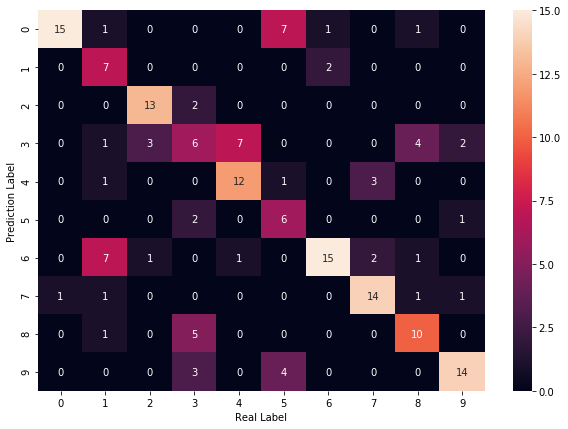

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:2 index:[5 9] real:5
#1 min_error:1 index:[3] real:2
#2 min_error:1 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1 6] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:1 index:[3] real:3
#8 min_error:1 index:[2] real:2
#9 min_error:3 index:[1 6] real:1
#10 min_error:2 index:[2 3 4] real:7
#11 min_error:0 index:[6] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:2 index:[2 3] real:3
#14 min_error:3 index:[1 6] real:1
#15 min_error:2 index:[2 3] real:3
#16 min_error:2 index:[7] real:9
#17 min_error:2 index:[1 6] real:1
#18 min_error:2 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[0] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:2 index:[6] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:2 index:[2 3] real:3
#28 min_error:2 index:[1 6] real:6
#29 min_error:0 index:[9] real:

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7149041434755721
Avg Base Learner:0.8406307977736549


In [16]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6222222222222222


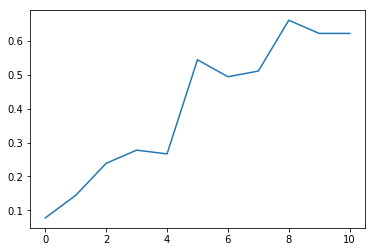

In [17]:
plt.plot(range(11),list_acc)
plt.show()

In [18]:
list_acc

[0.07777777777777778,
 0.14444444444444443,
 0.2388888888888889,
 0.2777777777777778,
 0.26666666666666666,
 0.5444444444444444,
 0.49444444444444446,
 0.5111111111111111,
 0.6611111111111111,
 0.6222222222222222,
 0.6222222222222222]

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:351 Total connections::838
